# Requirements

# Laboratory Exercise - Run Mode (8 points)

## The Gym Dataset
The dataset contains detailed information on 973 gym members' workout sessions, including their exercise routines, physical attributes, and fitness metrics. The features include age, gender, weight, height, heart rate data (maxiumum BPM, average BPM, and resting BPM), session duration, calories burned, workout type, body fat percentage, water intake, workout frequency, and experience level. Each feature provides insights into different aspects of a gym member's workout habits, physical health, and overall fitness progression. These attributes, except for the 'burned calories', can be used as input variables for analysis and modeling. The 'burned calories' attribute serves as the target variable, representing the total calories burned during each workout session. This dataset offers a comprehensive set of features, making it ideal for exploring and understanding the factors that influence calorie burn during workouts.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

Load the dataset into a `pandas` data frame.

In [6]:
data=pd.read_csv('gym_members_exercise_tracking.csv')
data.sample(3)

Age  Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
509   37  Female         55.6        1.57      182      123           53   
622   41    Male         82.8        1.66      177      139           74   
798   19  Female         49.1        1.68      193      164           58   

     Session_Duration (hours)  Calories_Burned Workout_Type  Fat_Percentage  \
509                      0.97            597.0       Cardio            29.2   
622                      1.97           1355.0         HIIT            11.2   
798                      1.42           1164.0       Cardio            25.3   

     Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level  \
509                    2.4                              2                 1   
622                    3.5                              5                 3   
798                    2.6                              4                 2   

       BMI  
509  22.56  
622  30.05  
798  17.40

Preprocess the input and the output variables appropriately.

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

Explore the dataset using visualizations of your choice.

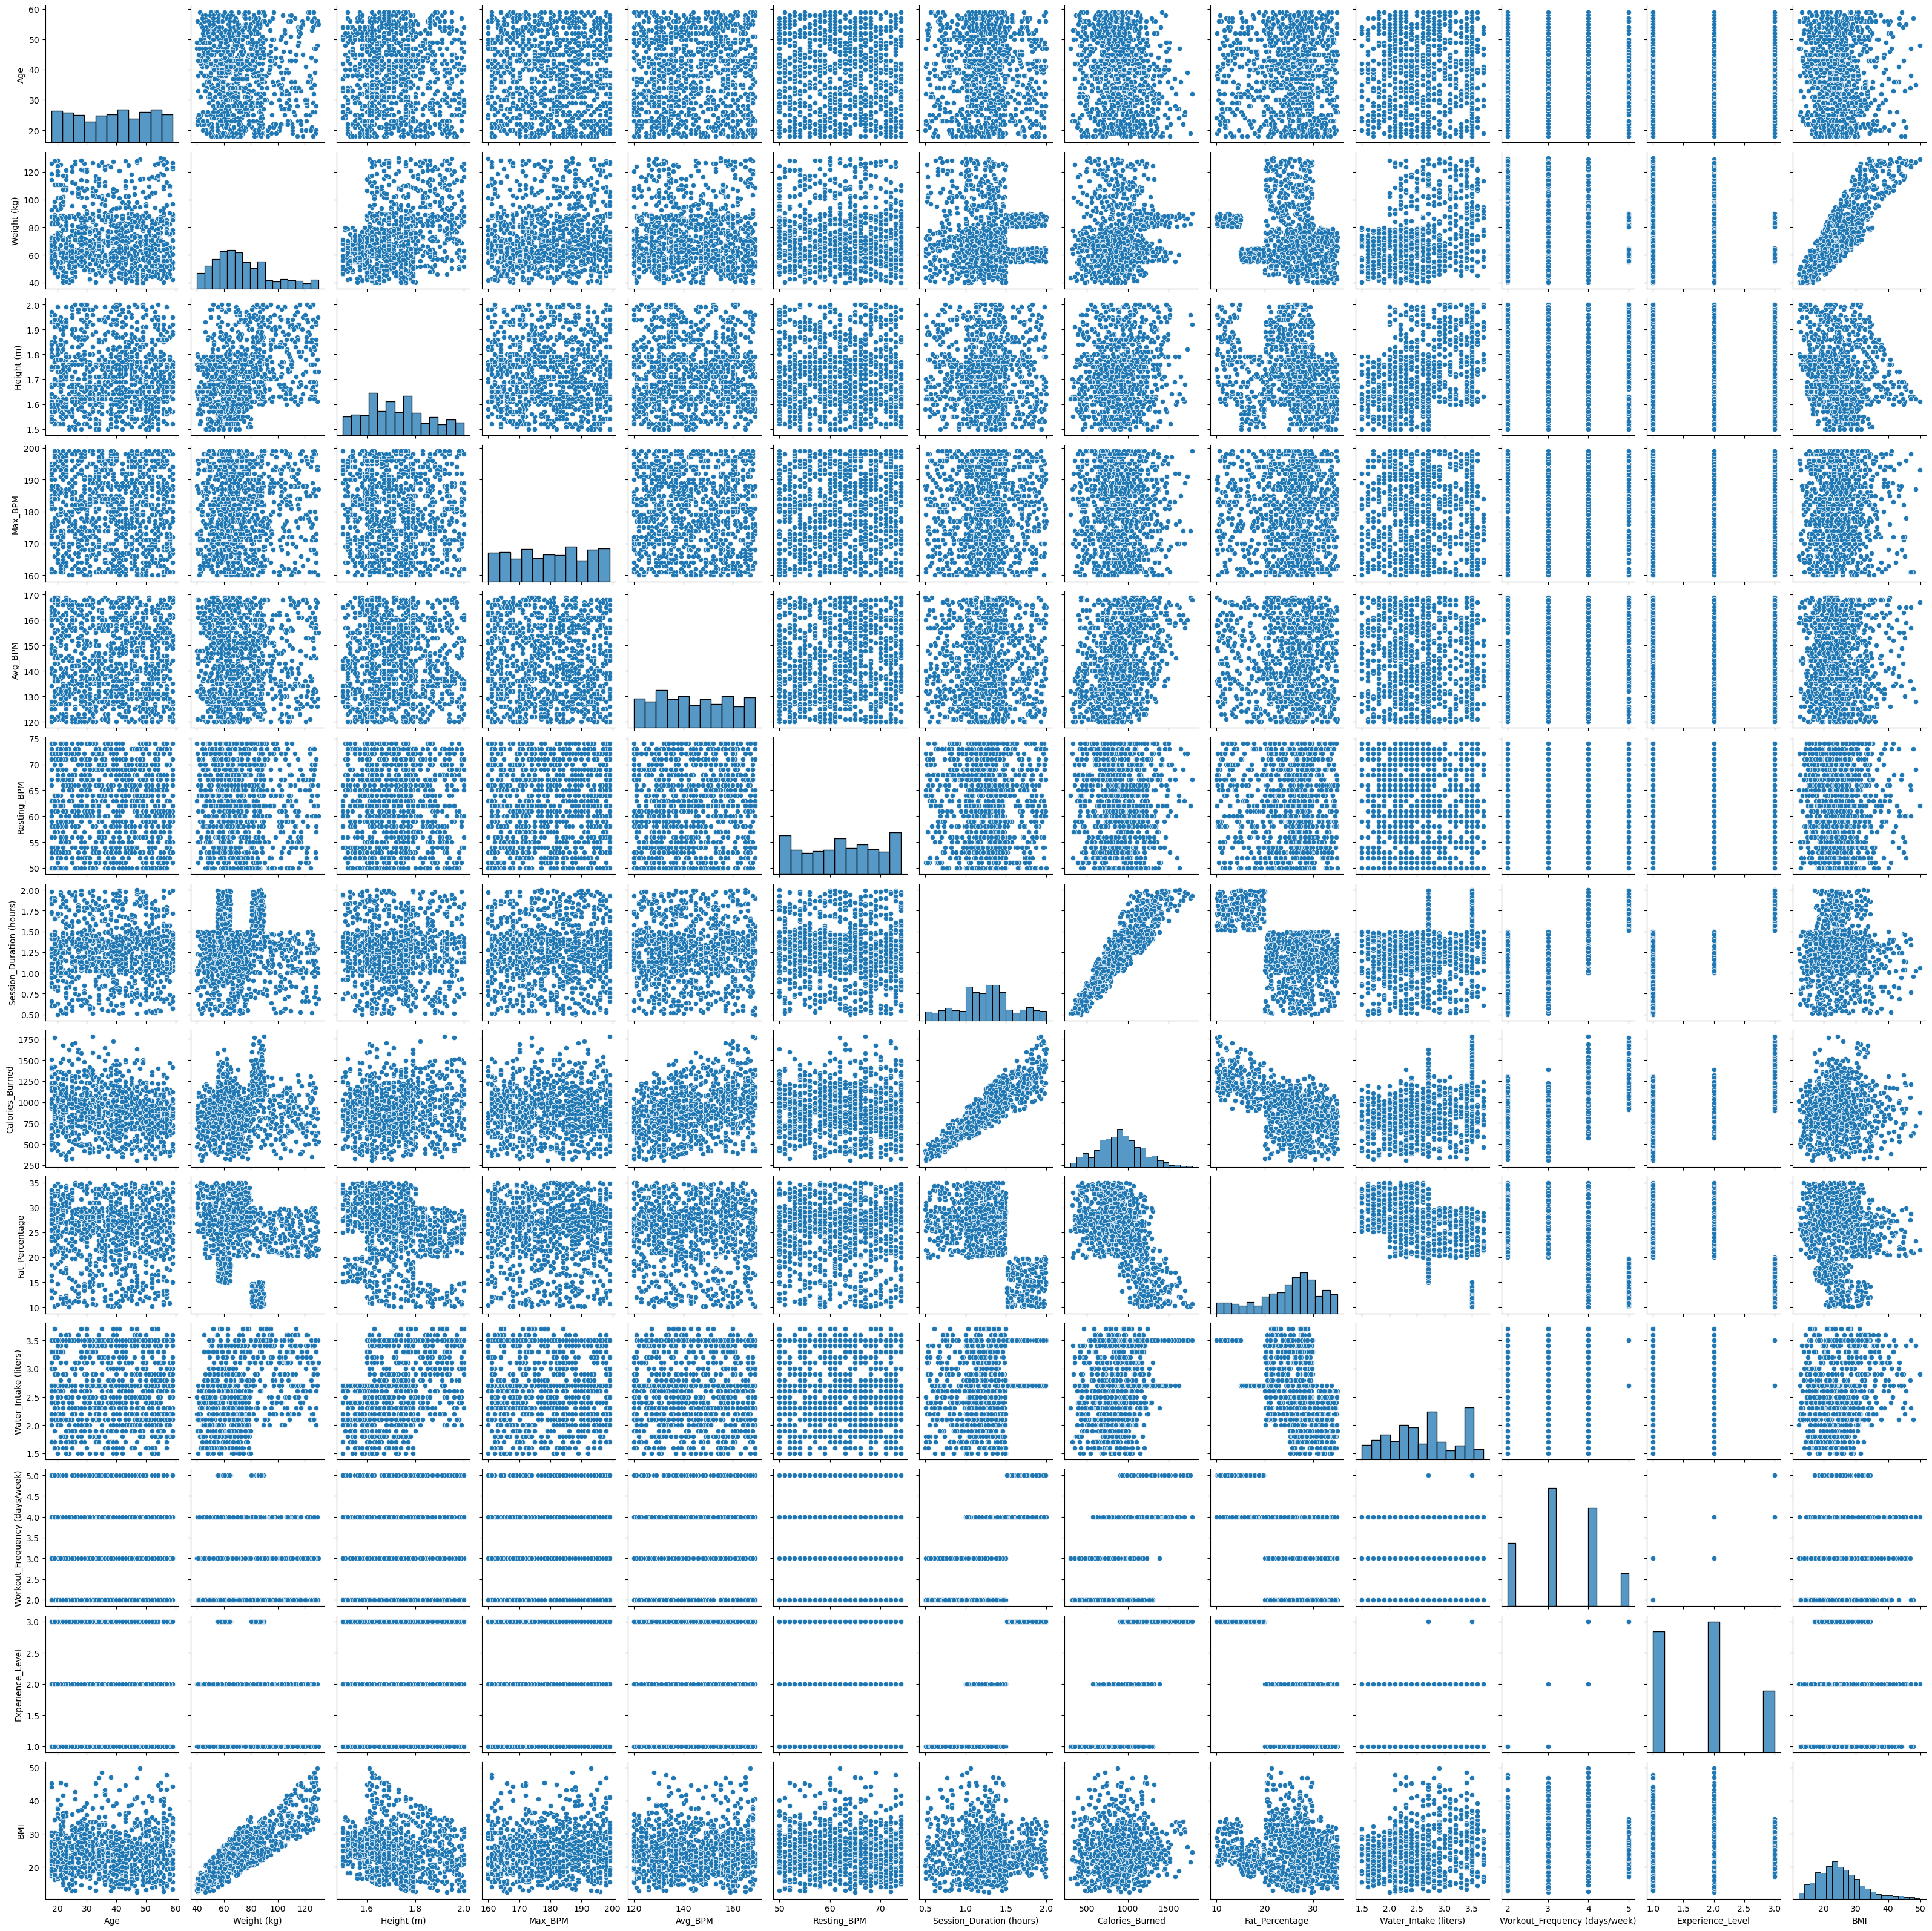

In [10]:
sns.pairplot(data)

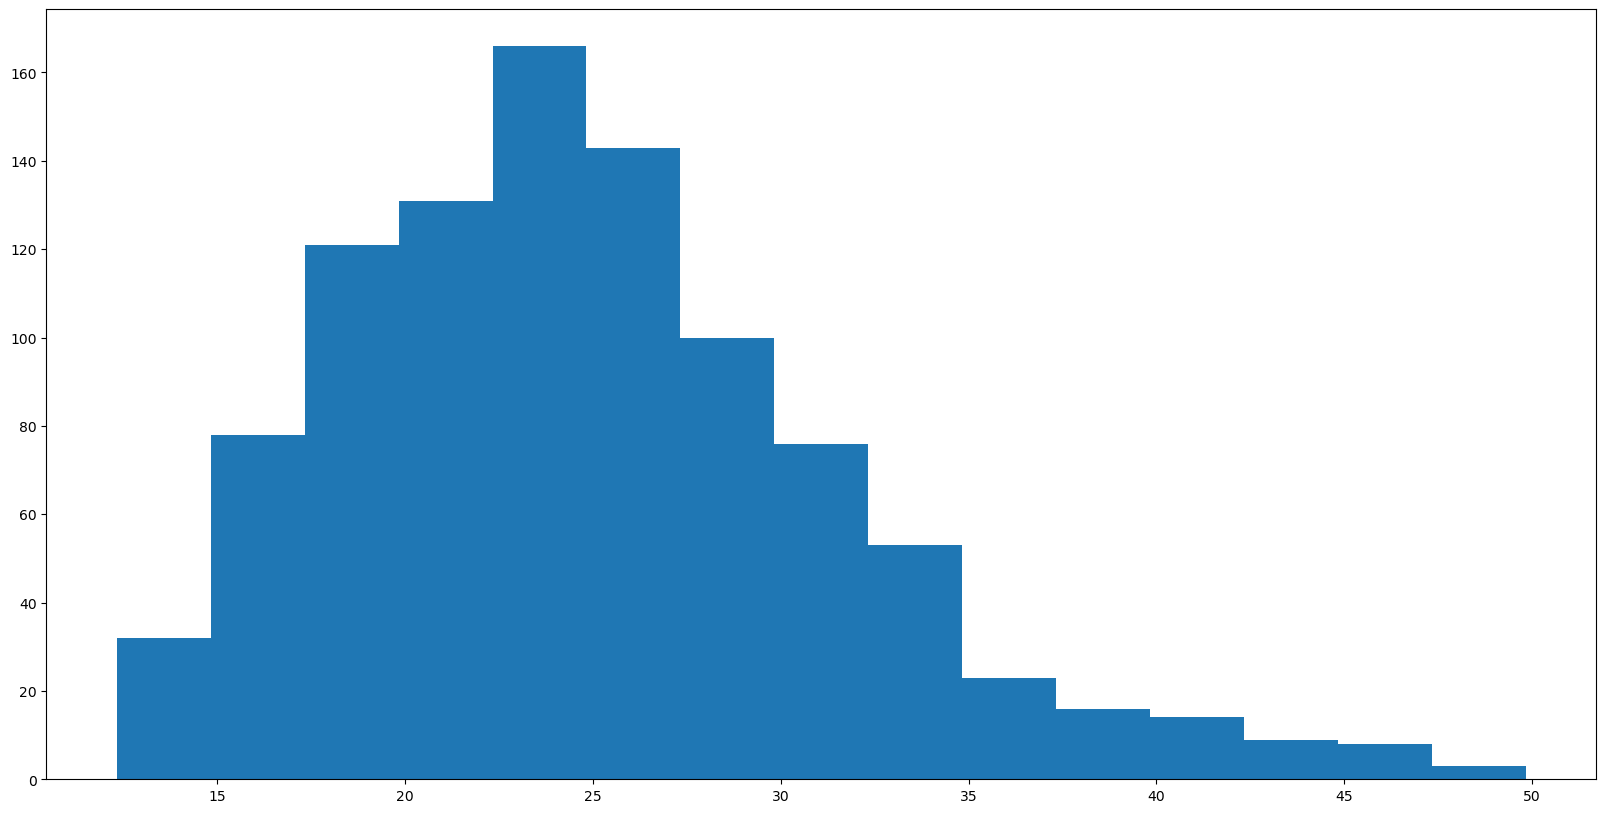

In [11]:
plt.figure(figsize=(20, 10))
plt.hist(data['BMI'], bins=15)
plt.show()

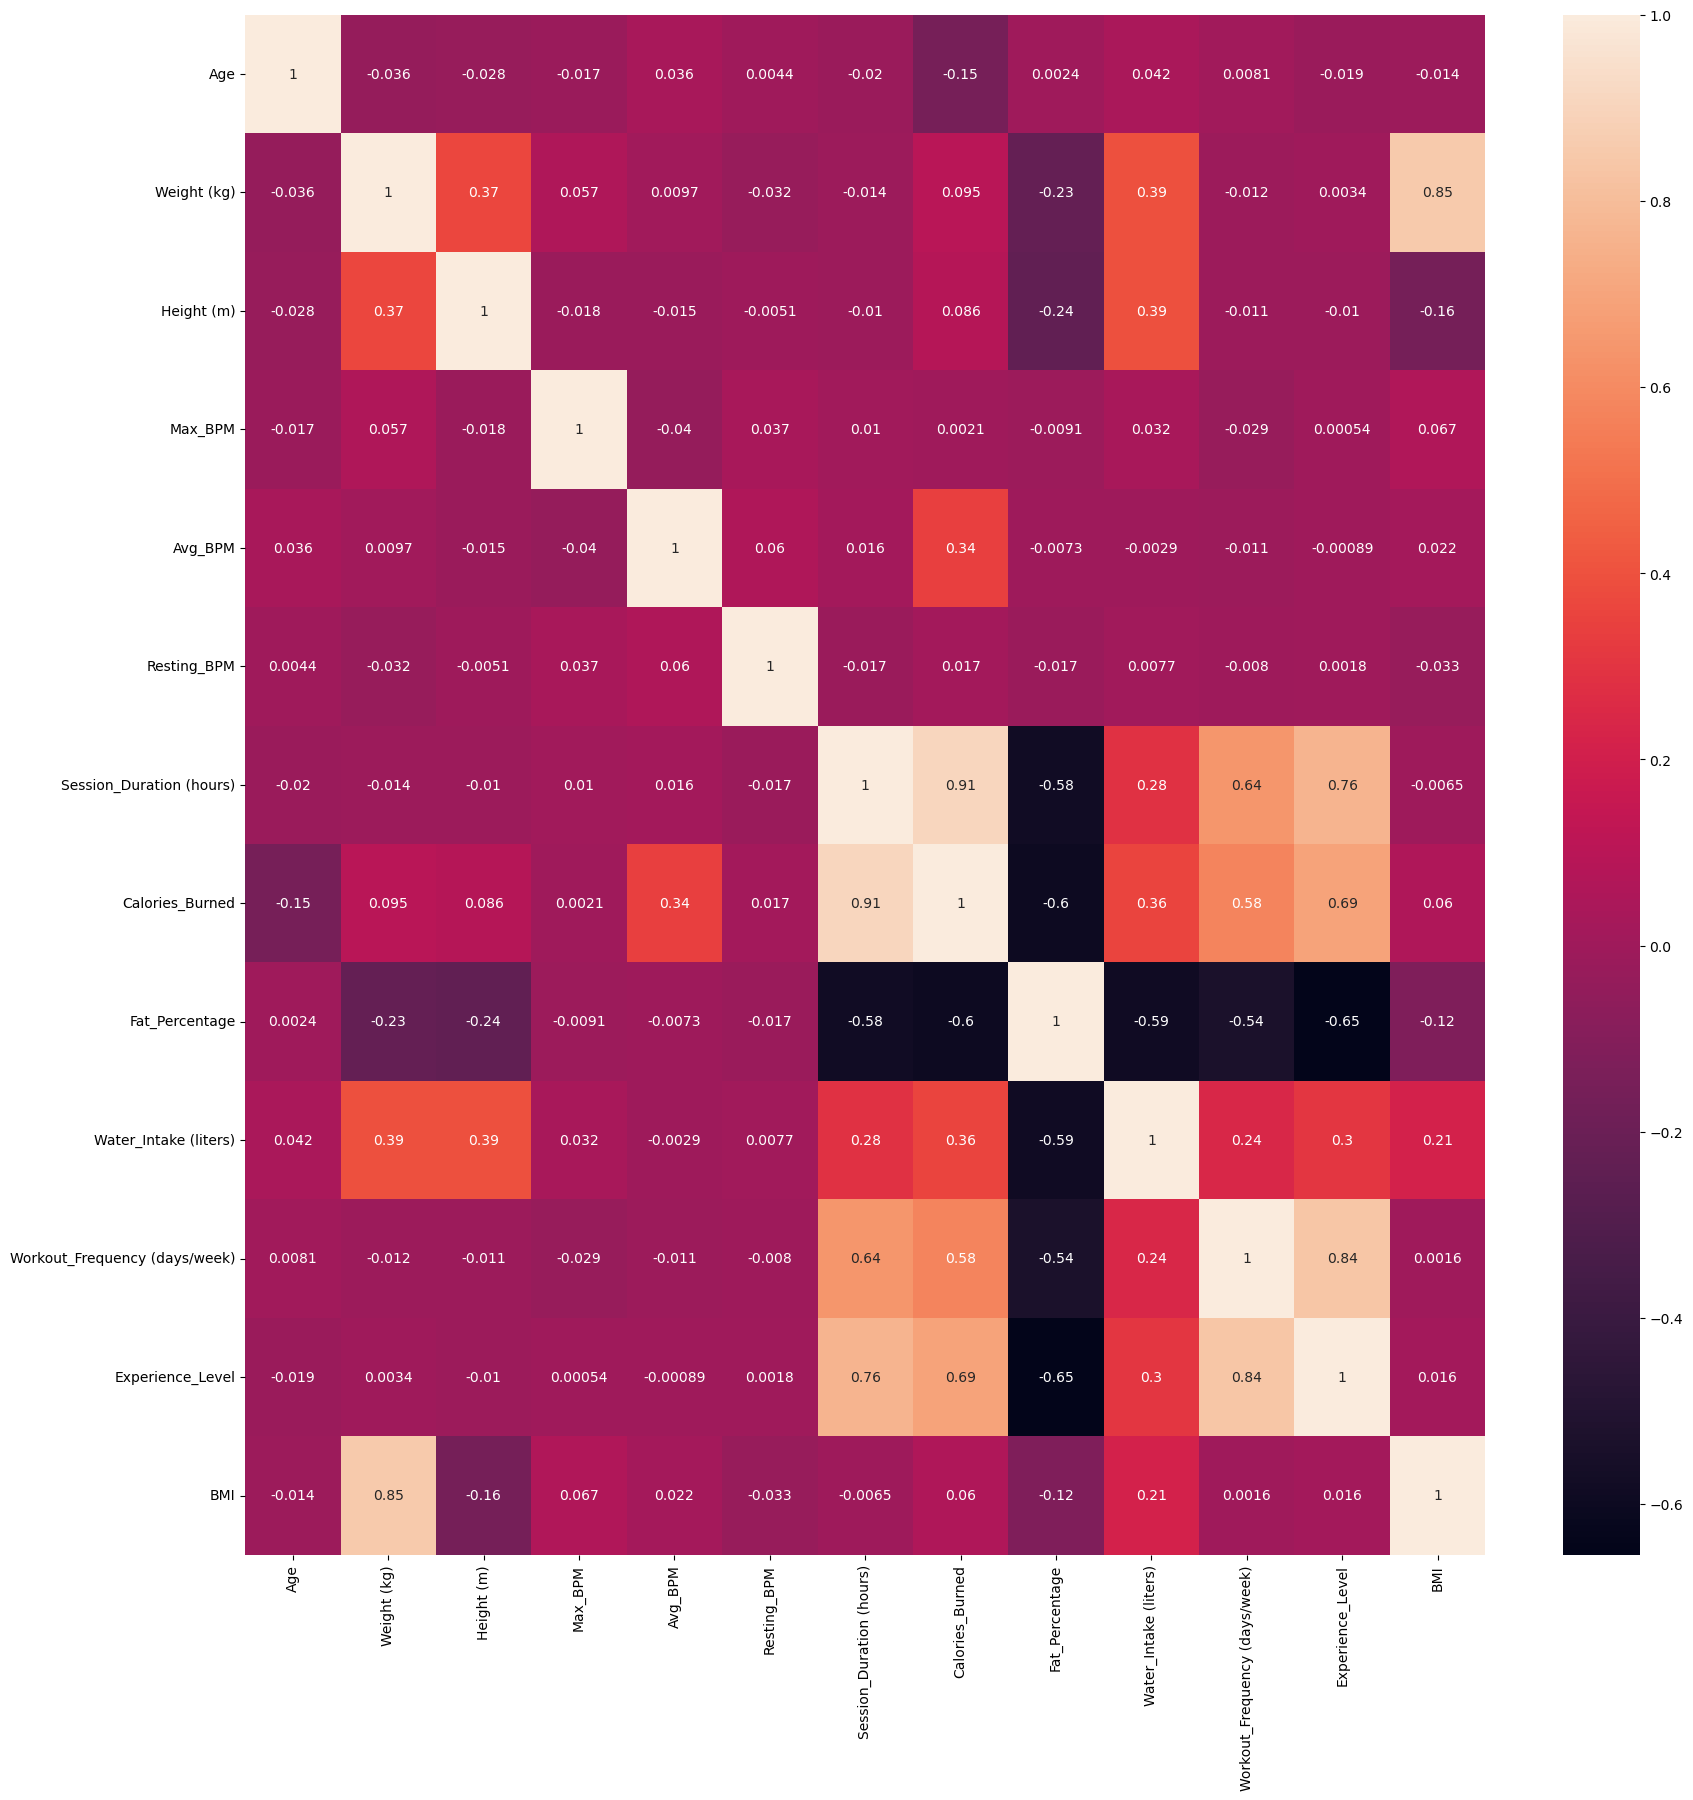

In [12]:
plt.figure(figsize=(20, 20))
sns.heatmap(data.drop(columns=['Gender', 'Workout_Type']).corr(), annot=True)
plt.show()

Check if the dataset is balanced.

In [14]:
data['Calories_Burned'].value_counts()

Calories_Burned
1025.0    6
883.0     6
875.0     5
832.0     5
711.0     4
         ..
1029.0    1
1187.0    1
482.0     1
1096.0    1
542.0     1
Name: count, Length: 621, dtype: int64

In [15]:
bins = [0, 700, 1200, 1800] 
labels = ['Low', 'Medium', 'High'] 
data['Calories_Category'] = pd.cut(data['Calories_Burned'], bins=bins, labels=labels)

print(data['Calories_Category'].value_counts())

Calories_Category
Medium    624
Low       217
High      132
Name: count, dtype: int64


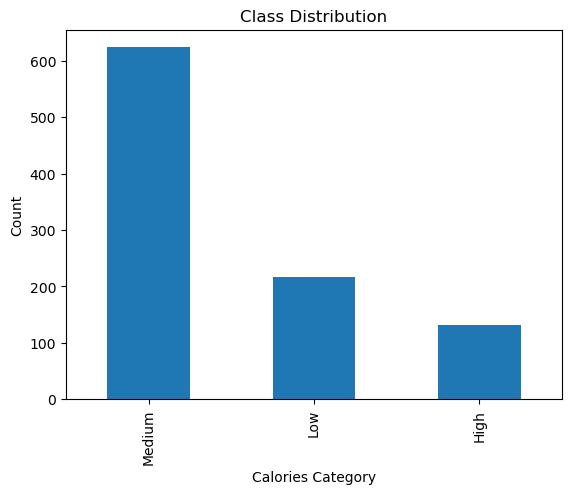

In [16]:
data['Calories_Category'].value_counts().plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Calories Category')
plt.ylabel('Count')
plt.show()

In [17]:
data.sample(3)

Age  Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
772   22  Female         44.8        1.72      166      132           54   
660   39  Female         50.3        1.61      167      128           50   
422   33  Female         58.0        1.53      180      126           50   

     Session_Duration (hours)  Calories_Burned Workout_Type  Fat_Percentage  \
772                      1.48            977.0       Cardio            28.6   
660                      1.17            749.0         HIIT            32.8   
422                      1.84           1159.0     Strength            18.3   

     Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level  \
772                    1.8                              4                 2   
660                    2.5                              2                 1   
422                    2.7                              5                 3   

       BMI Calories_Category  
772  15.14            Medium  
660  19.41            Medium  
422  24.78            Medium

In [18]:
data = data.drop(columns='Calories_Category')

In [19]:
data.sample(3)

Age  Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
157   50  Female         67.1        1.75      161      120           59   
679   54  Female         75.6        1.61      180      155           52   
363   49    Male         70.2        1.89      194      127           51   

     Session_Duration (hours)  Calories_Burned Workout_Type  Fat_Percentage  \
157                      0.67            362.0       Cardio            31.8   
679                      1.41            983.0         Yoga            34.9   
363                      0.70            440.0         Yoga            29.6   

     Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level  \
157                    2.7                              3                 1   
679                    2.5                              4                 2   
363                    2.6                              3                 1   

       BMI  
157  21.91  
679  29.17  
363  19.65

## Detecting Missing Values
Calculate the percentage of missing values present in each column of the dataset.

In [21]:
missing_percent = data.isnull().sum() / len(data) * 100
missing_percent = missing_percent.reset_index().rename(columns={"index": "column", 0: "percent missing"})
missing_percent

column  percent missing
0                             Age              0.0
1                          Gender              0.0
2                     Weight (kg)              0.0
3                      Height (m)              0.0
4                         Max_BPM              0.0
5                         Avg_BPM              0.0
6                     Resting_BPM              0.0
7        Session_Duration (hours)              0.0
8                 Calories_Burned              0.0
9                    Workout_Type              0.0
10                 Fat_Percentage              0.0
11          Water_Intake (liters)              0.0
12  Workout_Frequency (days/week)              0.0
13               Experience_Level              0.0
14                            BMI              0.0

## Understanding the Causes Behind Missing Values
Using visualization tools such as heatmaps, and dendrograms, illustrate the interdependence between attributes with missing values. Also, visualize the distribution of the missing values within the dataset using matrices and bar charts.

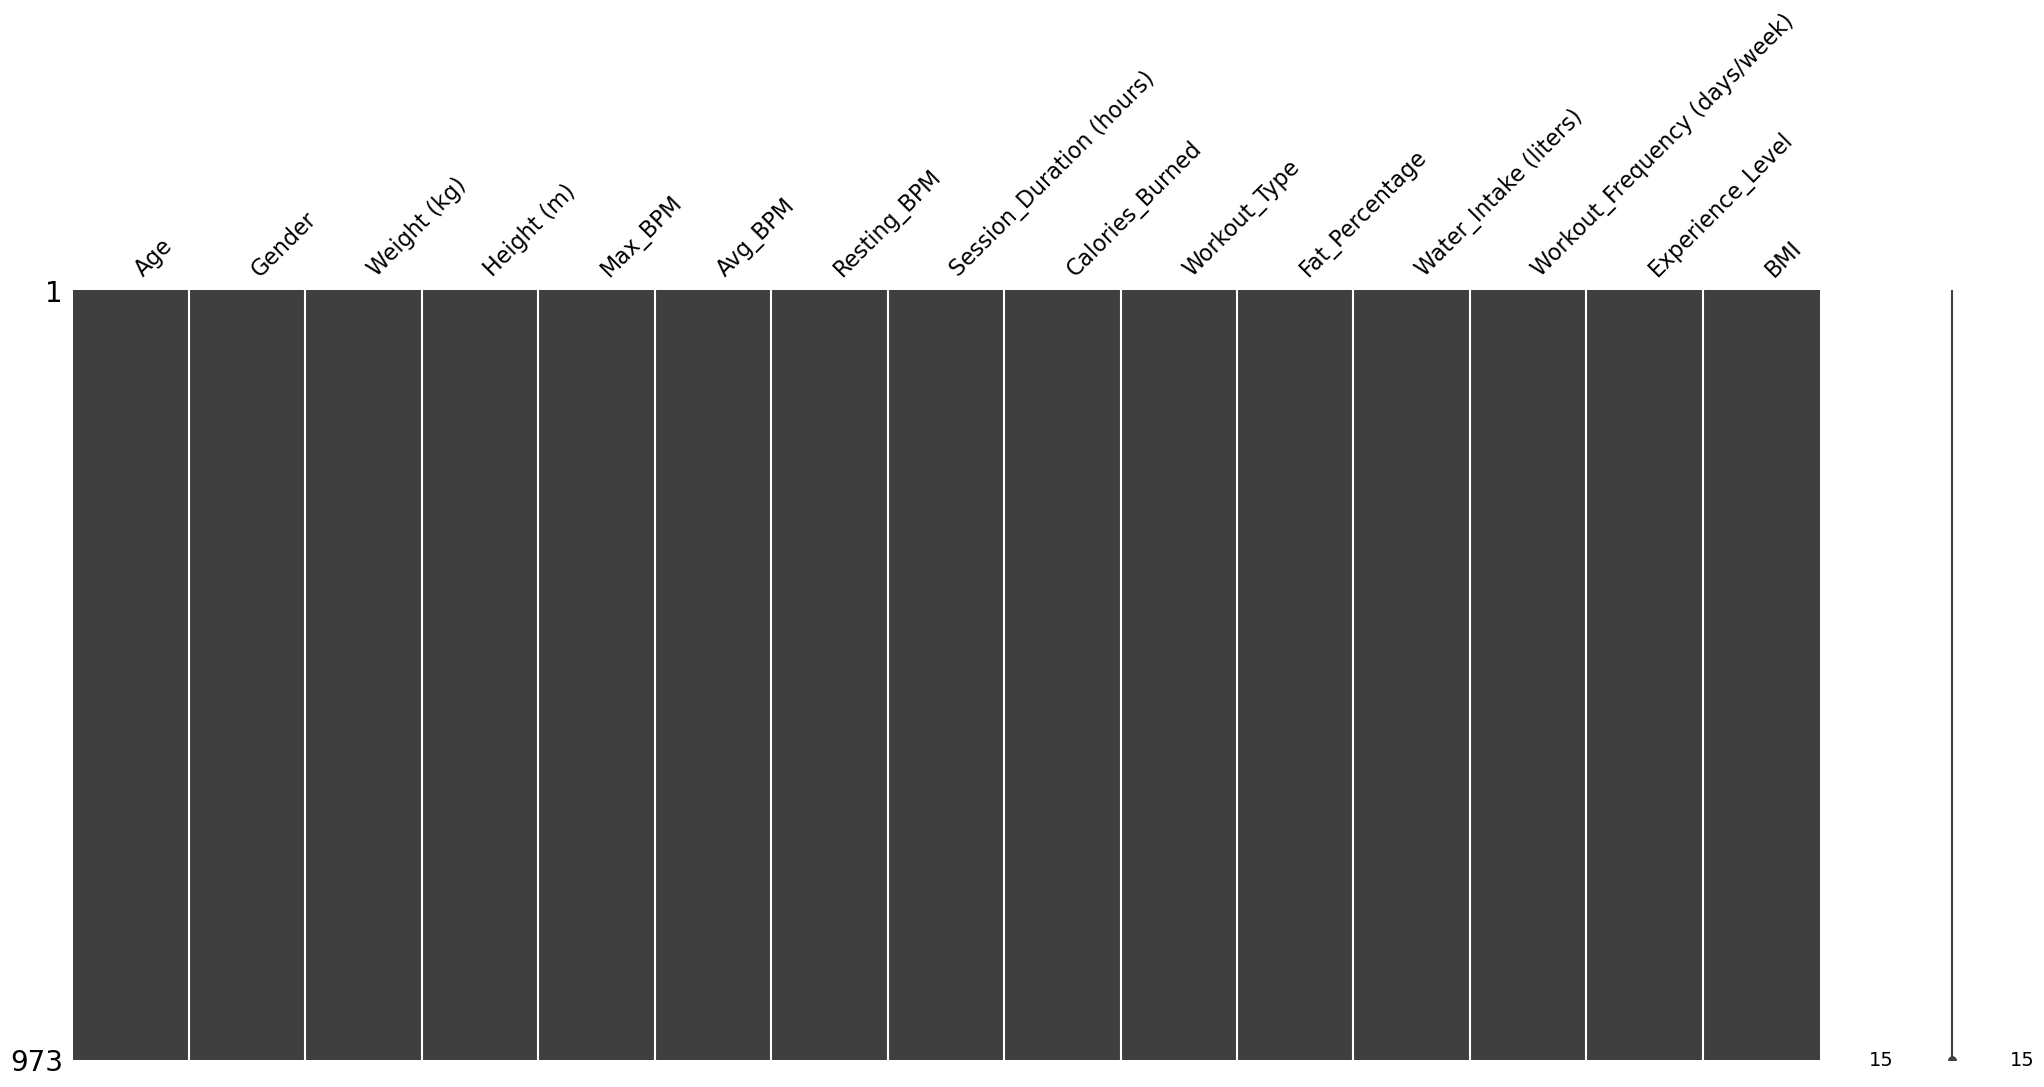

In [23]:
msno.matrix(data)
plt.show()

## Handling the Missing Values
Handle the missing values using suitable method based on the insights obtained from the various visualizations.

## Dataset Splitting
Partition the dataset into training and testing sets with an 80:20 ratio.

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

## Feature Scaling
Standardize the features appropriately.

In [28]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

for column in data.columns:
    if type(data[column].to_list()[0]) == str:
         data[column] = encoder.fit_transform(data[column])

## Model Selection

Choose and train an approriate model for the given task.

In [31]:
copy=data.copy()
X = data.drop(['Calories_Burned'],axis=1)
Y = data.Calories_Burned

In [32]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2)

In [33]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Use the trained model to make predictions for the test set.

In [35]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [36]:
model.fit(X_train,y_train)

LinearRegression()

In [37]:
model.intercept_

911.1760925449872

In [38]:
y_pred = model.predict(X_test)

Assess the performance of the model by using different classification metrics.

In [47]:
mean_absolute_error(y_test,y_pred)

26.70804211004765

In [45]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
mean_squared_error(y_test,y_pred)

1202.591314768293

In [49]:
r2_score(y_test,y_pred)

0.9824253267873595

# Laboratory Exercise - Bonus Task (+ 2 points)

As part of the bonus task in this laboratory assignment, your objective is to fine-tune at least one hyper-parameter using a cross-validation with grid search. This involves systematically experimenting with various values for the hyper-parameter(s) and evaluating the model's performance using cross-validation. Upon determining the most suitable value(s) for the hyper-parameter(s), evaluate the model's performance on a test set for final assessment.

Hint: Use the `GridCVSearch` from the `scikit-learn` library. Check the documentation at https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html.

## Dataset Splitting
Partition the dataset into training and testing sets with an 90:10 ratio.

In [51]:
copy=data.copy()
X = data.drop(['Calories_Burned'],axis=1)
Y = data.Calories_Burned

In [53]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.1)

## Feature Scaling
Standardize the features appropriately.

In [56]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [58]:
from sklearn.model_selection import KFold, RepeatedKFold
#podatochnoto m-vo: (1,2,3,4,5) 4-train 1-test x5 vo plus 1 iteracii
rkf = RepeatedKFold(n_splits=5)
rkf.get_n_splits(X, Y)

50

In [60]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

In [62]:
param_grid ={
    'criterion':["gini", "entropy", "log_loss"],
    'max_depth': [10,15,20,25],
    'min_samples_split': [4,8,12]
}

In [64]:
from sklearn.model_selection import GridSearchCV

cv = GridSearchCV(estimator=model,param_grid=param_grid,cv=rkf)

In [66]:
cv.fit(X,Y)

GridSearchCV(cv=RepeatedKFold(n_repeats=10, n_splits=5, random_state=None),
             estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [10, 15, 20, 25],
                         'min_samples_split': [4, 8, 12]})

In [68]:
cv.best_score_

0.004523922812582606

In [70]:
model = cv.best_estimator_

In [72]:
y_pred = model.predict(X_test)

C:\Users\dimit\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [74]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred)

0.0

## Fine-tuning the Hyperparameters
Experiment with various values for the chosen hyperparameter(s) and evaluate the model's performance using cross-validation.

In [ ]:
# Write your code here. Add as many boxes as you need.

## Final Assessment of the Model Performance
Upon determining the most suitable hyperparameter(s), evaluate the model's performance on a test set for final assessment.

In [ ]:
# Write your code here. Add as many boxes as you need.